<a href="https://colab.research.google.com/github/daniellorieri/Data_Science_E_Analise_de_Dados/blob/main/Churn_An%C3%A1lise_Explorat%C3%B3ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Objetivo:
 - Analisar a taxa de churn dos clientes em relação a algumas variáveis para extrair informações que possam auxiliar na retenção dos clientes.

In [2]:
#Importando as biblliotecas
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt


df = pd.read_csv('/content/drive/My Drive/dataset/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


###Váriáveis existentes no conjunto de dados
- CustomerId: identificação do cliente;
- Surname: sobrenome do cliente;
- CreditScore: pontuação de credito, 0 alto risco de - inadimplência e 1000 clientes com baixo risco de - - - - inadimplência;
- Geography: país que o serviço é oferecido;
- Gender: sexo do cliente;
- Age: idade do cleinte;
- Tenure: um indicativo de estabilidade no emprego, em que -0 significa pouca estabilidade e 10 muita estabilidade.
- Balance: saldo da conta corrente;
- NumOfProducts: número de produtos bancários adquiridos;
- HasCrCard: se tem cartão de credito ou não, (Sim = 1 e -Não = 0);
- IsActiveMember: se é um cliente com conta ativa, (Ativo -= 1) ;
- EstimatedSalary: salário estimado;
- Exited: cliente deixou de ser cliente do banco ou não --(Churn = 1).

##Identificando as varáveis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


####Os dados se dividem em:
 - Varáveis Categóricas : país, cartão de crédito, clientes ativos e saída do cliente
 - Variáveis numéricas: escore do cliente, idade, tenure, balance, número de produtos, salário estimado

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


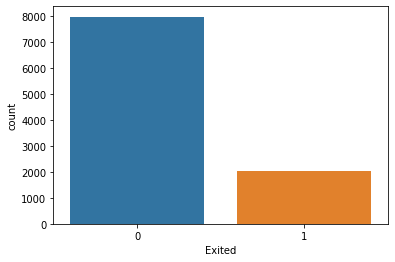

In [5]:

sns.countplot(df['Exited'])

##### Visualizando a Variável Alvo: , 
 - 0 =  não cancelou a conta.
 - 1 = cancelou.
#####Nota que poucos cliente cancelaram a conta.

###Análise Exploratória

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


- Os cliente têm em média 39 anos, com idade mínima de 18 anos e idade máxima de 92 anos. 50% a 75% da base de clientes desta agência tem entre 37 a 44anos.
- 70% dos clientes possuem cartão de crédito.
- Os cliente tem em média de 1,5 dos produtos bancarios.
- Os clientes tem em média U$76.500 mil dolares em conta.
- 75% do cleintes tem um Score de crédito de 718.000, mostra que a maioria tem um bom score de crédito.
- Nota-se que quanto mais velho maior estabilidade no emprego o cliente tem.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


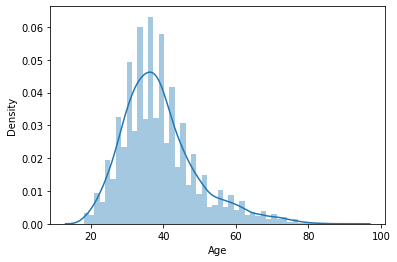

In [7]:
sns.distplot(df['Age'],hist = True, kde = True)

- Variável idade mostra uma distribuição gama, valores assimétricos mais concentrados à esquerda. Mostra que a maioria dos cliente tem entre 30 à 45 anos.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


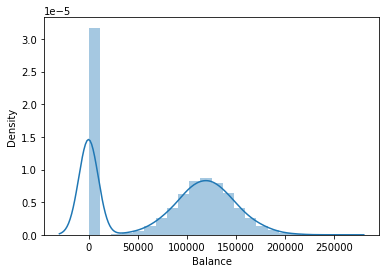

In [8]:
sns.distplot(df['Balance'],hist = True, kde = True)

- Mostra um número grande de cliente com pouco dinheiro na conta, podem possuir contas em outros bancos, talvez aqui taxas de juros mmais baixas e tarifas mais baixas, sejam um diferencial para reter o cliente.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


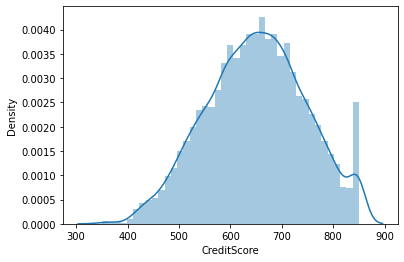

In [9]:
sns.distplot(df['CreditScore'],hist = True, kde = True)

-Essa variável, mostra valores assimetricos mais concentrados à esquerda, indica que maior parte do clientes, possuem um socre de crédito elevado.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


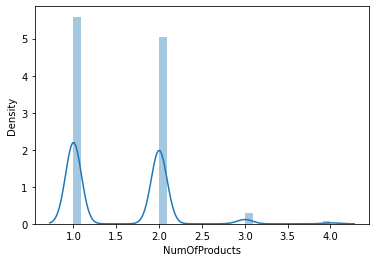

In [10]:
sns.distplot(df['NumOfProducts'],hist = True, kde = True)

-Essa varável numero de produtos, mostra que que a maior parte dos cliente possuem até 2 produtos bancários.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


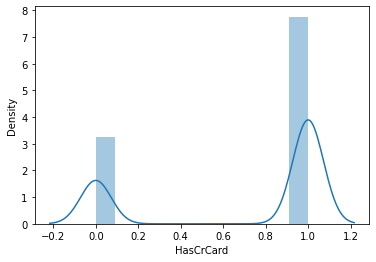

In [11]:
sns.distplot(df['HasCrCard'],hist = True, kde = True)

-O gráfico da variável cartão de crédito, mostra que grande parte dos cliente usam cartão de crédito.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


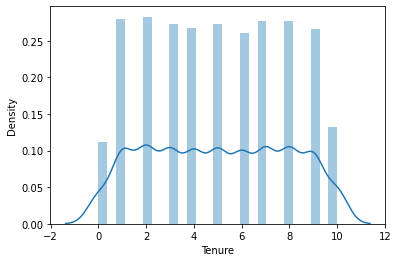

In [12]:
sns.distplot(df['Tenure'],hist = True, kde = True)

Variavel estabilidade no emprego, apresenta um forma uniforme, um certo equilibrio.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


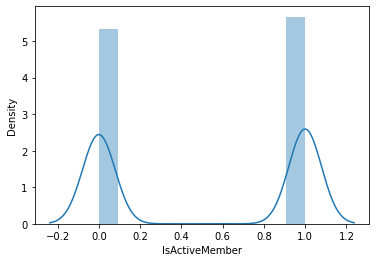

In [13]:
sns.distplot(df['IsActiveMember'],hist = True, kde = True)

-Notamos que o gráfico da varável cliente ativos, mostra que existe um equilíbiro entre quem movimenta a conta e quem não movimenta a conta.

##Varáveis Categóricas

- Variável País

In [14]:
df['Geography'] = df['Geography'].replace(['France','Germany', 'Spain'], ['França','Alemanha','Espanha'])

In [15]:
df_plot = df.groupby('Geography'). Exited.mean(). reset_index()
df_plot

,Geography,Exited
0,Alemanha,0.324432
1,Espanha,0.166734
2,França,0.161548


- País em relação a variável exited (churn)

In [16]:
#DEFININDO UMA PALETA DE CORES PARA MELHOR VISALIZAÇÃO FO GRÁFICO
myred='#CD5C5C'
myblue='#6495ED'
mygreen='#90EE90'
colunas= [myred, myblue,mygreen]

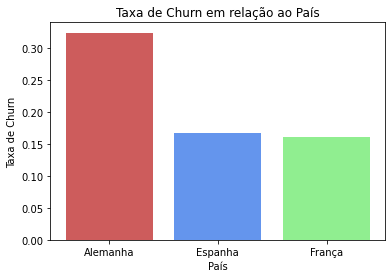

In [17]:
x = df_plot['Geography']
y= df_plot['Exited']
plt.bar(x,y, color=colunas);
plt.title('Taxa de Churn em relação ao País');
plt.xlabel('País');
plt.ylabel('Taxa de Churn');




- Obsevamos que Espanha e França tem uma taxa equivalente de 16% dos cliente encerrarem a conta.
- Já na Alemanha a taxa de churn é de 32%, cliente que encerram a conta.

- Variável Cartão de crédito em relação a varável Churn(exited)

In [18]:
df['HasCrCard'] = df['HasCrCard'].replace([0,1],['Não','Sim'])

In [19]:
df_plot = df.groupby('HasCrCard') .Exited.mean(). reset_index()
df_plot

,HasCrCard,Exited
0,Não,0.208149
1,Sim,0.201843


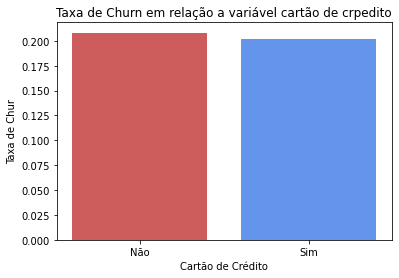

In [20]:
x = df_plot['HasCrCard']
y = df_plot['Exited']
plt.bar(x,y, color=colunas);
plt.title('Taxa de Churn em relação a variável cartão de crpedito');
plt.xlabel('Cartão de Crédito');
plt.ylabel('Taxa de Chur');

- Observamos no gráfico que o cartão de crédito aparentemente não influencia no Churn, ou seja no encerramento da conta.

- Variável Cliente Ativo

In [21]:
df['IsActiveMember'] = df['IsActiveMember'].replace([0,1],['Não','Sim'])

In [22]:
df_plot = df.groupby('IsActiveMember'). Exited.mean(). reset_index()
df_plot

,IsActiveMember,Exited
0,Não,0.268509
1,Sim,0.142691


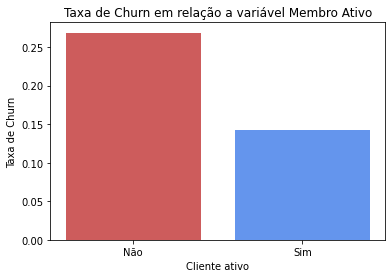

In [23]:
#Cliente ativo em relação a variável Churn
x = df_plot['IsActiveMember']
y = df_plot['Exited']
plt.bar(x,y,color=colunas);
plt.title('Taxa de Churn em relação a variável Membro Ativo');
plt.xlabel('Cliente ativo');
plt.ylabel('Taxa de Churn');

- Observamos que a taxa de churn é maior para os clientes não ativos.

###Variaveis Numéricas


In [24]:
df_cont=df[['Age','Balance','Tenure','NumOfProducts','EstimatedSalary']]
df_cont

,Age,Balance,Tenure,NumOfProducts,EstimatedSalary
0,42,0.00,2,1,101348.88
1,41,83807.86,1,1,112542.58
2,42,159660.80,8,3,113931.57
3,39,0.00,1,2,93826.63
4,43,125510.82,2,1,79084.10
...,...,...,...,...,...
9995,39,0.00,5,2,96270.64
9996,35,57369.61,10,1,101699.77
9997,36,0.00,7,1,42085.58
9998,42,75075.31,3,2,92888.52


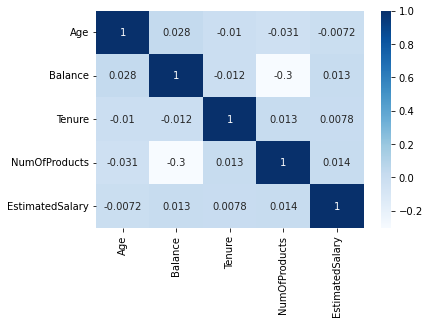

In [25]:
sns.heatmap(df_cont.corr(),annot = True, cmap ='Blues');

- matriz de correlação, verificar a relação entre as variáveis.
-Nota que a correlação é baixa. A maior correlação é entre numero de produtos e saldo bancário que possui uma correlção negatica -0.3. Correlação inversa entre essas varáveis, quanto maior o menor o numero de produto, maior o saldo bancário.

###Analise das varáveis numéricas em relação a varável churn.

In [33]:
df['Exited_cat']=df['Exited'].replace([0,1],['Nao','Sim'])


- Variável número de produtos

In [26]:
df_plot = df.groupby ('NumOfProducts').Exited.mean(). reset_index () 
df_plot

,NumOfProducts,Exited
0,1,0.277144
1,2,0.075817
2,3,0.827068
3,4,1.000000


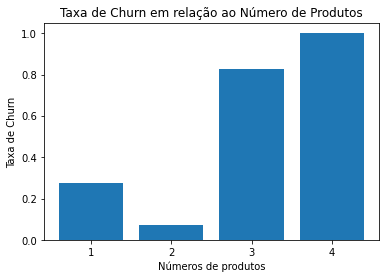

In [27]:

#Número de produtos em relação a variável churn
x =df_plot['NumOfProducts']
y=df_plot['Exited']
plt.bar(x,y);
plt.title('Taxa de Churn em relação ao Número de Produtos');
plt.xlabel('Números de produtos');
plt.ylabel('Taxa de Churn');
plt.xticks(x, (1,2,3,4)); #funçaõ permite alterar o eixo do gráfico

- Observamos que quanto mais produtos o cliente têm, maior a chance de ele cancelar a conta.
- Cliente com muito produtos, são cliente ativos, e recebem propostas de concorrentes com taxas e tarifas mais atrativas para portabilidade. Devem ser monitorados e ter um atendimento personalizado para que os mesmos não migrem para concorrência.

- Variável Estabilidade no emprego (Tenure)

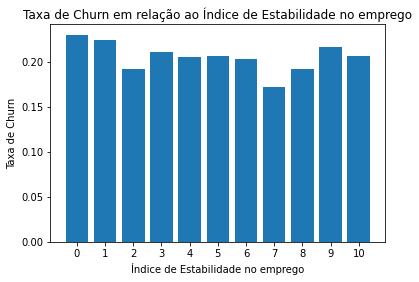

In [28]:

df_plot = df.groupby ('Tenure'). Exited.mean (). reset_index () 
#Número de produtos em relação a variável churn
x =df_plot['Tenure']
y=df_plot['Exited']
plt.bar(x,y);
plt.title('Taxa de Churn em relação ao Índice de Estabilidade no emprego');
plt.xlabel('Índice de Estabilidade no emprego');
plt.ylabel('Taxa de Churn');
plt.xticks(x, (0,1,2,3,4,5,6,7,8,9,10));

- Grafico mais unifome, mostra que a estabilidade não influência tanto na taxa de churn.

- Variável saldo Bancário

Exited_cat
Nao    72745.296779
Sim    91108.539337
Name: Balance, dtype: float64

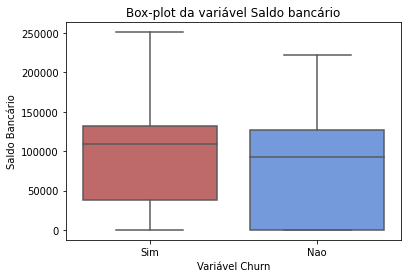

In [34]:
cols= [myred, myblue,mygreen]
sns.boxplot(x="Exited_cat", y="Balance", data=df,palette=cols);
plt.title('Box-plot da variável Saldo bancário');
plt.xlabel('Variável Churn');
plt.ylabel('Saldo Bancário');
df.groupby(['Exited_cat'])['Balance'].mean()

A taxa de churn é maior para cliente com saldo bancário maior.

- Variavél salário em relação ao Churn

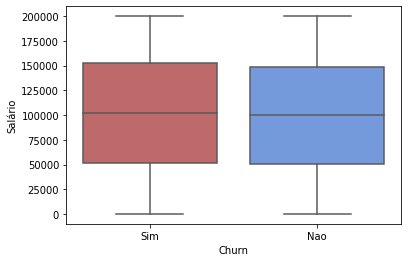

In [35]:
sns.boxplot(x="Exited_cat", y="EstimatedSalary" , data=df,palette=cols);
df.groupby(['Exited'])['EstimatedSalary'].mean()
plt.xlabel('Churn');
plt.ylabel('Salário');

- Oberser que o saálrio não tem muito influencio na taxa de churn, ambos equivalentes.

- Váriavel idade em relação ao Churn

Text(0, 0.5, 'Taxa de Churn')

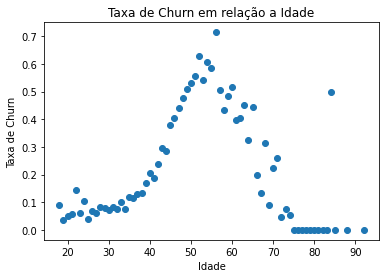

In [36]:
df_plot = df.groupby ('Age'). Exited.mean (). reset_index () 
#Número de produtos em relação a variável churn
x = df_plot['Age']
y = df_plot['Exited']
plt.scatter(x,y)
plt.title('Taxa de Churn em relação a Idade')
plt.xlabel('Idade')
plt.ylabel('Taxa de Churn')

- Observando o gráfico de dispersão, obeserva que as pessoas com idade entre 50 a 60 anos cancelam mais a conta bancária.

Exited
0    37.408389
1    44.837997
Name: Age, dtype: float64

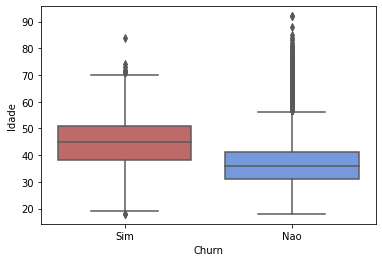

In [37]:
sns.boxplot(x="Exited_cat", y="Age" , data=df,palette=cols);
plt.xlabel('Churn');
plt.ylabel('Idade');
df.groupby(['Exited'])['Age'].mean()

- O Blox-Plot confirma que cliente com maior idade cacelaram a conta.

- Churn em relação ao score de crédito




Text(0, 0.5, 'Taxa de Churn')

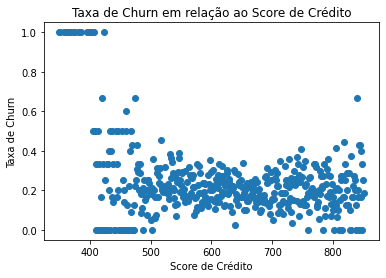

In [38]:
df_plot = df.groupby ('CreditScore'). Exited.mean (). reset_index () 

x =df_plot['CreditScore']
y=df_plot['Exited']
plt.scatter(x,y)
plt.title('Taxa de Churn em relação ao Score de Crédito')
plt.xlabel('Score de Crédito')
plt.ylabel('Taxa de Churn')

Fica evidente que a taxa de churn é maior em cliente com baixo score de crédito.

##Conclusão da Análise de dados.

- Fica evidente que o perfil do cliente com taxa de churn maior, são pessoas com idades entre 40 a 60 anos e com score de crédito mais baixo.
- O País onde o cancelamento do serviço é maior é a Alemanha.
- Cliente não ativos tem uma maior taxa de cancelamento
- Essa análise mostra pontos onde podem ser trabalhados, para desenvolver estratégias para fidelizar o cliente,onde pode ser explorado um atendimento mais personalisado, felxibilidade em taxas de empréstimos e tarifas diferenciadas com sistemas de recompensas por produtos ou pontos.